# Plot percent IFN positive cells

First, load packages and define functions:

In [1]:
# install R packages
r_packages <- c(
  "ggplot2", "cowplot", "dplyr", "magrittr", "viridis",
  "IRdisplay", "tidyverse", "stringr", "scales")
suppressMessages(invisible(
  lapply(r_packages, library, character.only=TRUE)))

# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
# The palette with grey:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
               "#0072B2", "#D55E00", "#CC79A7")

saveShowPlot <- function(p, width, height) {
  # save plot with filename of variable name with dots replaced by _
  pngfile <- sprintf("%s.png", gsub("\\.", "_", deparse(substitute(p))))
  pdffile <- sprintf("%s.pdf", gsub("\\.", "_", deparse(substitute(p))))
  ggsave(pngfile, plot=p, width=width, height=height, units="in")
  ggsave(pdffile, plot=p, width=width, height=height, units="in")
  display_png(file=pngfile, width=width * 90)
}

Next read in data on percent IFN+:

In [2]:
ifn_data <- read.csv("ifn_stats.csv") %>% select(condition, replicate, IFNpercent)

ifn_data

condition,replicate,IFNpercent
Uninfected,1,0.04973063
Sendai,1,99.17302799
Influenza,1,0.42731411
Uninfected,2,0.06347191
Sendai,2,99.39355753
Influenza,2,0.55916190
Uninfected,3,0.04021556
Sendai,3,99.47635916
Influenza,3,0.50192188


Now plot these data.
We draw a dashed line at the limit of detection determined by the gating in the [analyze_flow.ipynb](analyze_flow.ipynb) notebook:

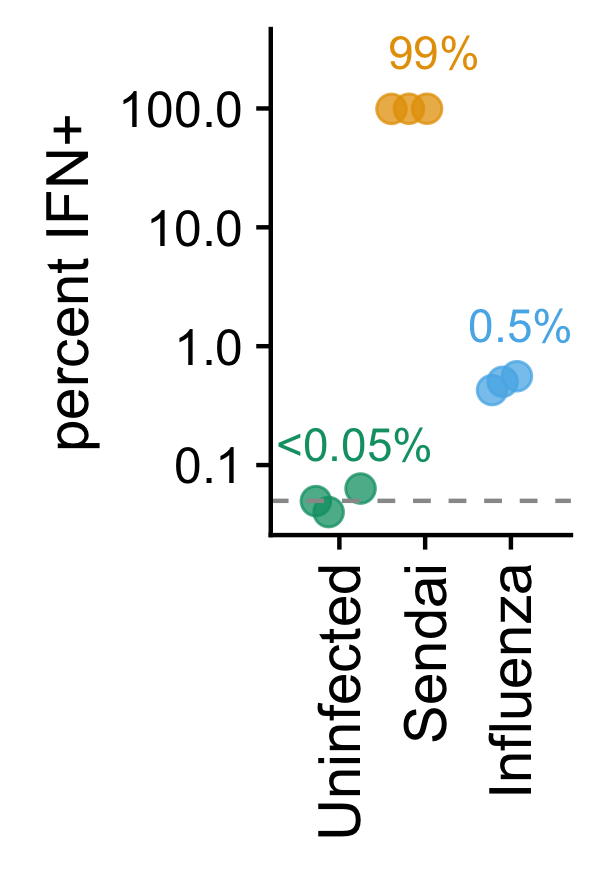

In [3]:
detect_limit <- 0.05

set.seed(24) # seed that gives nice jittering

ifn_percent <- ggplot(
    ifn_data %>% transform(condition=factor(condition, c("Uninfected", "Sendai", "Influenza"))),
    aes(condition, IFNpercent, color=condition)) +
  geom_jitter(height=0, width=0.4, size=3, alpha=0.75) +
  geom_text(
    data=ifn_data %>% 
      group_by(condition) %>% 
      summarize(median=median(IFNpercent)) %>%
      mutate(label=ifelse(condition == "Uninfected", 
                   paste0("<", signif(median, 2), "%"),
                   paste0(signif(median, 2), "%"))
      ),
    aes(condition, y=3 * median, label=label), hjust=0.4
    ) +
  scale_y_log10(name="percent IFN+") +
  scale_color_manual(values=c(cbPalette[4], cbPalette[2], cbPalette[3])) +
  theme(
    legend.position='none',
    axis.text.x=element_text(angle=90, vjust=0.5, hjust=1, size=14),
    axis.title.x=element_blank()
    ) +
  geom_hline(yintercept=detect_limit, linetype='dashed', color=cbPalette[1]) +
  expand_limits(x=c(0.2, 3.7))

ifn_percent_plot <- "ifn_percent.pdf"

saveShowPlot(ifn_percent, width=2, height=2.9)